# Part 1: Using Gradient Descent to Solve Linear Regression

In this part of the lab, you will be requested to solve the linear regression problem using gradient descent. This means you will not use the closed form solution of linear regression to find the model's parameters, but gradient descent. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

For this exercise we will use some dummy data. 

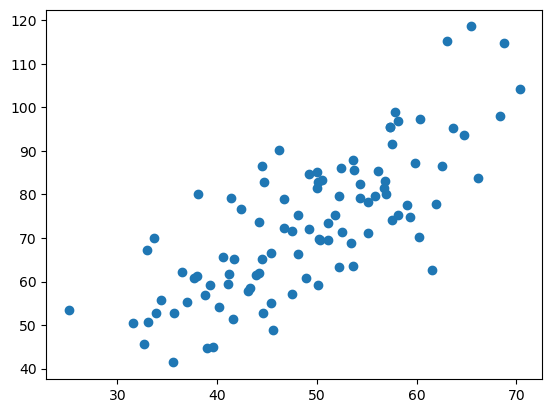

In [2]:
# We will use some dummy data
data = pd.read_csv('data/data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#Use a friendly format for X and y
X = X.to_numpy().reshape(-1,1)
y = Y.to_numpy().reshape(-1,1)

The data seems to follow a linear model of order one. Hence, we will try to fit the following linear regression model:
\begin{equation}
\hat{y} = \mathbf{w}^{T}\mathbf{x} + w_0
\end{equation}

Let us recall that for linear regression, we use the sum of squares loss function:
\begin{equation}
\mathcal{L} = \dfrac{1}{N}\sum_{i=1}^N(y_i - \hat{y})^2
\end{equation}

### Exercise 1: Implement the gradient descent function
You will need to complete the gradient descent function for linear regression. 

In [3]:
def gradient_descent(alpha, epochs, epsilon, X, y):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x (D + 1)
    y - Output vector of size N x 1

    Outputs:
    weights - Parameters vector of size (D + 1) x 1
    '''
  
    #Initialize weights
    weights = np.zeros((X.shape[1]+1,1))
    
    #Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1/N)
    prev_gradient = 0
    for e in range(epochs):
        
        #1) Estimate y_hat
        y_hat = np.dot(X, weights)
        
        #2) Estimate the gradient
        gradient = -2 * inv_N * np.dot(X.T, (y-y_hat))
        gradient_norm = np.linalg.norm(gradient)
        
        # print ('Epoch ', e, ' weights: ', weights, 'gradient_norm: ', gradient_norm) 
        
        #3) Check the stopping criterion
        if np.abs(gradient_norm - prev_gradient) <= epsilon:
            break
            
        #4) Update weights
        weights = weights + 2 * alpha * inv_N *np.dot(X.T, (y-y_hat))
        
        #5) Update previous gradient
        prev_gradient = gradient_norm
        
    return weights

Now, test your implementation:

In [4]:
def loss_function(X, y, weights):
    X = PolynomialFeatures(1).fit_transform(X)
    y_hat = np.dot(X, weights)
    return np.sum((y - y_hat) ** 2) / len(X)

In [5]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = gradient_descent(alpha, epochs, 0.00001, X, y)
loss = loss_function(X, y, weights)
print(f"weights given by gradient descent: {weights}")
print(f"Loss = {loss}")

weights given by gradient descent: [[0.030712 ]
 [1.4810366]]
Loss = 111.06221819219503


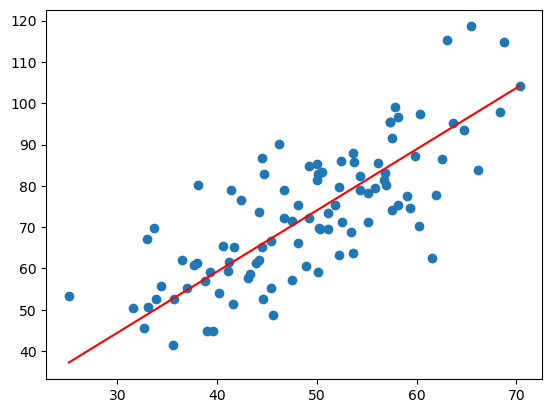

In [6]:
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()

### Question 1: Stopping criterion
Explain what is being done at steps 3 and 5 of the code.

#Your answer

Since the Gradient Descent is an iterative method, it produces an infinite sequence. To stop the iterations, we need a stopping criteria. Here, we stop when the absolute difference between the norm of the gradient and the previous norm it had is smaller than a given tolerance epsilon. The smaller is the epsilon, the higher the number of iterations needed to satisfy the criterion and we expect the solution to be more accurate. Viceversa for higher tolerance.
Then we update the weights and at step 5 we update the previous gradient with the one we've just calculated always because the method we're using is iterative and we will need the updated value at the next step when we do the difference in point 3.

### Exercise 2: Hyper-parameters
Play a bit with the learning rate (alpha), the number of epochs and the stopping criterion. What can you say about the influence these have on your results? Make sure you document all your experiments.

In [7]:
# Your code and answer here
alphas = [0.001, 0.01, 0.1]
epochs = [50, 100, 200]
epsilons = [1e-4, 1e-5, 1e-6]

results = []
losses = []

min_loss = np.inf
max_loss = 0
min_params = []
max_params = []

for alpha in alphas:
    for epoch in epochs:
        for epsilon in epsilons:
            weights = gradient_descent(alpha, epoch, epsilon, X, y)
            results.append({'alpha': alpha, 'epochs': epoch, 'epsilon': epsilon, 'weights': weights, 'loss':loss})
            curr_loss = loss_function(X, y, weights)
            losses.append(curr_loss)
            if curr_loss < min_loss:
                min_loss = curr_loss
                min_params.append({'alpha': alpha, 'epochs': epoch, 'epsilon': epsilon, 'weights': weights, 'loss':curr_loss})
            if curr_loss > max_loss:
                max_loss = curr_loss
                max_params.append({'alpha': alpha, 'epochs': epoch, 'epsilon': epsilon, 'weights': weights, 'loss':curr_loss})

for loss in losses:
    print(f'loss: {loss}')

loss: 1.2174312836294298e+64
loss: 1.2174312836294298e+64
loss: 1.2174312836294298e+64
loss: 2.694747727364522e+124
loss: 2.694747727364522e+124
loss: 2.694747727364522e+124
loss: 1.3202781265183313e+245
loss: 1.3202781265183313e+245
loss: 1.3202781265183313e+245
loss: 7.473815844513919e+172
loss: 7.473815844513919e+172
loss: 7.473815844513919e+172
loss: inf
loss: inf
loss: inf
loss: nan
loss: nan
loss: nan
loss: 4.5913810608153605e+273
loss: 4.5913810608153605e+273
loss: 4.5913810608153605e+273
loss: inf
loss: inf
loss: inf
loss: nan
loss: nan
loss: nan


C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\1580289205.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\3551918762.py:4: RuntimeWarning: overflow encountered in square
  return np.sum((y - y_hat) ** 2) / len(X)
C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\1580289205.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\3551918762.py:4: RuntimeWarning: overflow encountered in square
  return np.sum((y - y_hat) ** 2) / len(X)
C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\1580289205.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\3551918762.py:4: RuntimeWarning: overflow encountered in square
  return np.sum((y - y_hat

Depending on the values of the learning rate alpha, the epochs and the tolerance epsilon, we see that we have different results of the loss that are very big due to the bad choice of parameters.
- Small learning rates can result in very slow convergence, instead with bigger ones we could have some problems of jumps that do not lead to the right solution
- If the number of epochs is limited, then the algorithm may return before the minimum is found, not giving a good result. Otherwise, the whole process might take a very large amount of time.
- If we put a small epsilon tolerance, then we need more iterations but it could not be feasible
  
To state our point, here are some plots:

alpha = 1e-05, epochs = 10, epsilon = 1e-06 --> with small values for each parameter it doesn't work


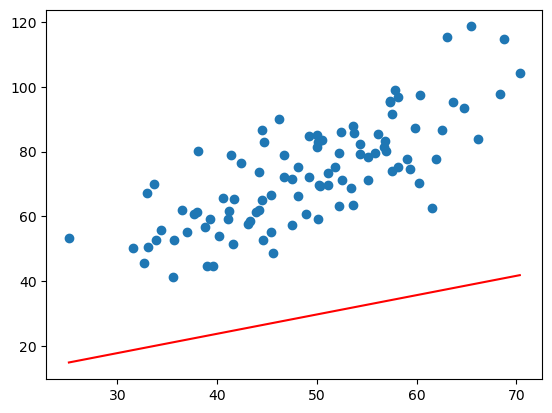

In [8]:
alpha = 0.00001  # The learning Rate
epochs = 10  # The number of iterations to perform gradient descent
epsilon = 1e-6
weights = gradient_descent(alpha, epochs, epsilon, X, y)
loss = loss_function(X, y, weights)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
print(f"alpha = {alpha}, epochs = {epochs}, epsilon = {epsilon} --> with small values for each parameter it doesn't work")
plt.show()

alpha = 1e-05, epochs = 10, epsilon = 0.0001 --> we have still problems even increasing epsilon


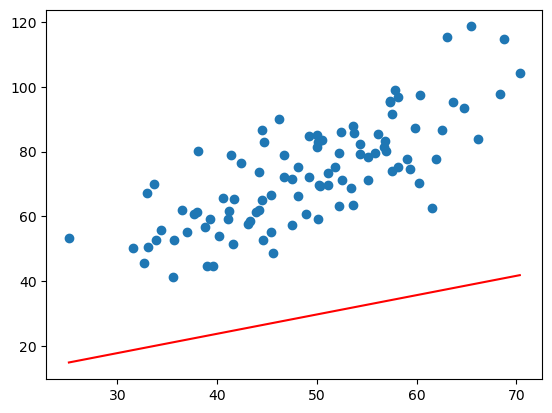

In [9]:
alpha = 0.00001  # The learning Rate
epochs = 10  # The number of iterations to perform gradient descent
epsilon = 1e-4
weights = gradient_descent(alpha, epochs, epsilon, X, y)
loss = loss_function(X, y, weights)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
print(f"alpha = {alpha}, epochs = {epochs}, epsilon = {epsilon} --> we have still problems even increasing epsilon")
plt.show()

C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\1580289205.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(gradient_norm - prev_gradient) <= epsilon:
C:\Users\sarar\AppData\Local\Temp\ipykernel_8900\1580289205.py:39: RuntimeWarning: invalid value encountered in add
  weights = weights + 2 * alpha * inv_N *np.dot(X.T, (y-y_hat))


alpha = 0.001, epochs = 1000, epsilon = 0.0001


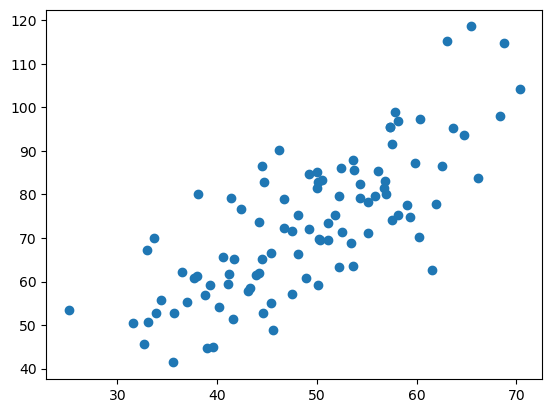

In [10]:
alpha = 0.001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
epsilon = 1e-4
weights = gradient_descent(alpha, epochs, epsilon, X, y)
loss = loss_function(X, y, weights)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
print(f"alpha = {alpha}, epochs = {epochs}, epsilon = {epsilon}")
plt.show()

alpha = 1e-05, epochs = 1000, epsilon = 1e-06 --> increasing the number of epochs it works better


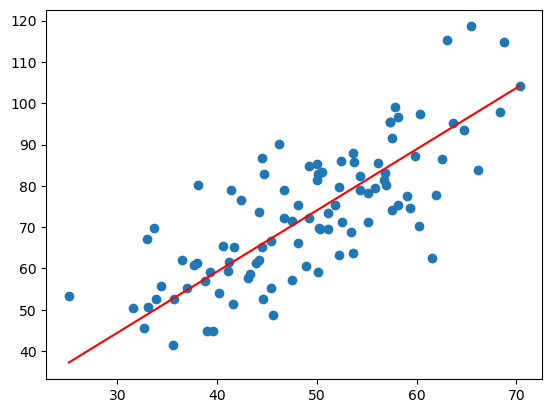

In [11]:
alpha = 0.00001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
epsilon = 1e-6
weights = gradient_descent(alpha, epochs, epsilon, X, y)
loss = loss_function(X, y, weights)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X),weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
print(f"alpha = {alpha}, epochs = {epochs}, epsilon = {epsilon} --> increasing the number of epochs it works better")
plt.show()

### Exercise 3: Comparison with closed form solution
Use your code from lab 1 or the demo used in the course to implement the closed form solution for linear regression.

In [12]:
# Your code here
class my_linear_regression:
    def __init__(self) : # initialize constructor for the object to assign the object its properties
        self.X_train = []
        self.y_train = []
        self.weights = []
        
    def fit(self, X, y) :
        self.X_train = X
        self.y_train = y
        # closed-form solution
        self.weights = np.linalg.solve(X.T@ X, X.T@y)
    
    def predict(self,x_test) : # method of the object that can be used
        self.y_hat=np.sum(x_test*self.weights,axis=1)
        return self.y_hat

### Question 2: Comparison
What are the differences between the results obtained with gradient descent and with the closed form solution.

In [13]:
model = my_linear_regression()
model.fit(PolynomialFeatures(1).fit_transform(X), y)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X), model.weights)

print(f'Closed form solution weights:\n{model.weights}\n')
loss_closedform = np.sum((y - y_hat) ** 2) / len(X)

Closed form solution weights:
[[9.90860619]
 [1.28735737]]



In [14]:
loss_closedform

107.47043700950906

The sum of squares loss function gives two different values for the two models:
- gradient descent loss: 110.93878035971453
- closed form solution: 107.47043700950906

The second one is smaller and this is justified by the fact that gradient descent looks for an optimal solution that is not necessarily the global minimum. This search depends on various factors, such as the learning rate (if too large it could diverge, if too small it may converge very slow), number of epochs and epsilon. Instead, the closed form solution should give a more accurate result because is not impacted by the choice of hyperparameters.

### Bonus
Implement gradient descent using mini-batch and stochastic gradient descent.

In [15]:
def stochastic_minibatch(alpha, epochs, epsilon, X, y, batch_size=None, method='batch'):
    '''
    Performs gradient descent
    Inputs:
    alpha - learning rate
    epochs - number of iterations
    epsilon - threshold to stop iterations
    X - Input matrix of size N x D
    y - Output vector of size N x 1
    batch_size - Size of mini-batch (for mini-batch gradient descent)
    method - Optimization method ('batch', 'mini-batch', or 'stochastic')

    Outputs:
    weights - Parameters vector of size D x 1
    '''

    # Initialize weights
    weights = np.zeros((X.shape[1] + 1, 1))

    # Adds a one to the matrix so it copes with w_0
    X = PolynomialFeatures(1).fit_transform(X)
    N = len(X)
    inv_N = float(1 / N)
    M = len(y)
    inv_M = float(1/M)
    prev_gradient = 0

    for e in range(epochs):
        # Shuffle the data for stochastic gradient descent
        if method == 'stochastic':
            indices = np.random.permutation(N)
            X = X[indices]
            y = y[indices]

        for i in range(0, N, batch_size or N):
            # Select a mini-batch for mini-batch gradient descent
            X_i = X[i:i+batch_size, :] if batch_size else X
            y_i = y[i:i+batch_size] if batch_size else y

            # 1) Estimate y_hat
            y_hat = np.dot(X_i, weights)

            # 2) Estimate the gradient
            gradient = -2 * inv_M * np.dot(X_i.T, (y_i - y_hat))
            if method == 'stochastic':
                gradient = -2 * np.dot(X_i.T, (y_i - y_hat))
            
            gradient_norm = np.linalg.norm(gradient)

            # print('Epoch ', e, ' weights: ', weights.flatten(), ' gradient_norm: ', gradient_norm)

            # 3) Check the stopping criterion
            if np.abs(gradient_norm - prev_gradient) <= epsilon:
                print(f'Stopping early: Convergence reached (change in gradient_norm < {epsilon})')
                return weights

            # 4) Update weights
            weights = weights + 2 * alpha * inv_N * np.dot(X_i.T, (y_i - y_hat))

            # 5) Update previous gradient norm
            prev_gradient_norm = gradient_norm

    return weights

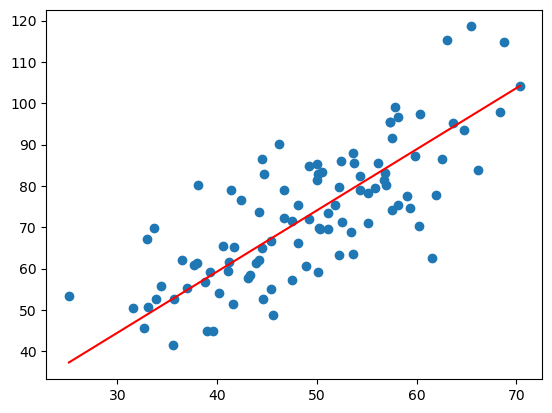

111.01093662287163

In [16]:
alpha = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
weights = stochastic_minibatch(alpha, epochs, 0.00001, X, y, 100, 'mini-batch')
loss = loss_function(X, y, weights)
y_hat = np.dot(PolynomialFeatures(1).fit_transform(X), weights)
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_hat), max(y_hat)], color='red') # predicted
plt.show()
weights
loss